#                                  Thyroid Cancer Disease Recurrence

## Project Aim
This project aiming to predict recurrence of well differentiated thyroid cancer

### Data Description

This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.


### Source 

The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

Content The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

Age: The age of the patient at the time of diagnosis or treatment.


Gender: The gender of the patient (male or female).


Smoking: Whether the patient is a smoker or not.


Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).


Hx Radiotherapy: History of radiotherapy treatment for any condition.


Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.


Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.


Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.


Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.


Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).


Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.


T: Tumor classification based on its size and extent of invasion into nearby structures.


N: Nodal classification indicating the involvement of lymph nodes.


M: Metastasis classification indicating the presence or absence of distant metastases.


Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.


Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.


Recurred: Indicates whether the cancer has recurred after initial treatment.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_thyroid= pd.read_csv("Thyroid_Diff.csv")
df_thyroid.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df_thyroid['Hx Radiothreapy'].unique()

array(['No', 'Yes'], dtype=object)

In [4]:
df_thyroid['Adenopathy'].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [5]:
df_thyroid["T"].unique()

array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object)

In [6]:
df_thyroid["N"].unique()

array(['N0', 'N1b', 'N1a'], dtype=object)

In [7]:
df_thyroid["M"].unique()

array(['M0', 'M1'], dtype=object)

In [8]:
df_thyroid.rename(columns= {'Hx Smoking': 'Smoking_History', 'Hx Radiothreapy':'Radiotherapy_History',
                   'Thyroid Function':'Thyroid_Function','Physical Examination':'Physical_Examination', 
                   'T':'Tumor_class', 'N':'Nodal_class', 'M':'Metastasis_class'}, inplace=True)

In [9]:
df_thyroid.head(2)

,Age,Gender,Smoking,Smoking_History,Radiotherapy_History,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Tumor_class,Nodal_class,Metastasis_class,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [10]:
df_thyroid['Metastasis_class'].unique()

array(['M0', 'M1'], dtype=object)

In [11]:

df_thyroid['Adenopathy'].replace({'No' : 'No Lympth Adenopathy' ,
                          'Left' : 'Left Side Body Adenopathy' ,
                          'Right' : 'Right Side Body Adenopathy' ,
                          'Extensive' : 'Extensive and Widespread'}, inplace = True)

df_thyroid['Tumor_class'].replace({'T1a' : 'tumor that is 1 cm or smaller' , 'T1b' : 'tumor larger than 1 cm but not larger than 2 cm' ,
                     'T2' : 'tumor larger than 2 cm but not larger than 4 cm' , 
                     'T3a' : 'tumor larger than 4 cm' ,'T3b' : 'tumor that has grown outside the thyroid' ,
                     'T4a' : 'tumor that has invaded nearby structures' ,
                     'T4b' : 'tumor that has invaded nearby structures'} , inplace =True)

df_thyroid['Nodal_class'].replace({'N0' : 'no evidence of regional lymph node metastasis' ,
                     'N1b' : 'regional lymph node metastasis in the central  of the neck' ,
                     'N1a' : 'regional lymph node metastasis in the lateral of the neck'} , inplace =True)

df_thyroid['Metastasis_class'].replace({'M0': 'no evidence of distant metastasis' , 
                                        'M1' : 'the presence of distant metastasis'} ,inplace =True )


df_thyroid['Stage'].replace({'I' : 'First-Stage' , 'II' : 'Second-Stage' , 'III' : 'Third-Stage'} ,inplace = True)
df_thyroid['Gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)


In [12]:
df_thyroid.head(5)

,Age,Gender,Smoking,Smoking_History,Radiotherapy_History,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Tumor_class,Nodal_class,Metastasis_class,Stage,Response,Recurred
0,27,Female,No,No,No,Euthyroid,Single nodular goiter-left,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Indeterminate,No
1,34,Female,No,Yes,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
2,30,Female,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
3,62,Female,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
4,62,Female,No,No,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Multi-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No


In [37]:
#Now our table is completed and ready for use
df_thyroid.to_csv('Thyroid_data', index = False)

# Data Analysis & Visualization

In [14]:
# Import necessary for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df_thyroid.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [16]:
df_thyroid.head(5)

,Age,Gender,Smoking,Smoking_History,Radiotherapy_History,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Tumor_class,Nodal_class,Metastasis_class,Stage,Response,Recurred
0,27,Female,No,No,No,Euthyroid,Single nodular goiter-left,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Indeterminate,No
1,34,Female,No,Yes,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
2,30,Female,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
3,62,Female,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
4,62,Female,No,No,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Multi-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No


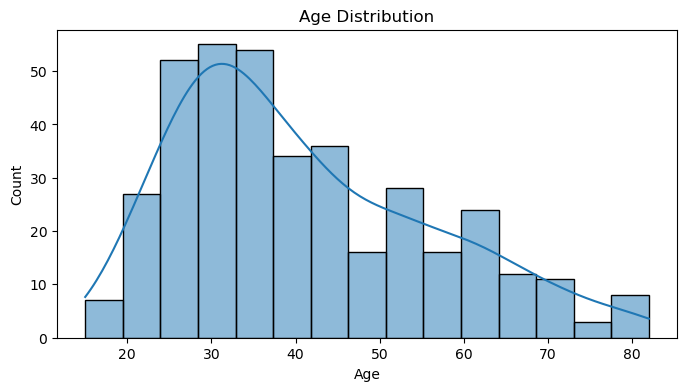

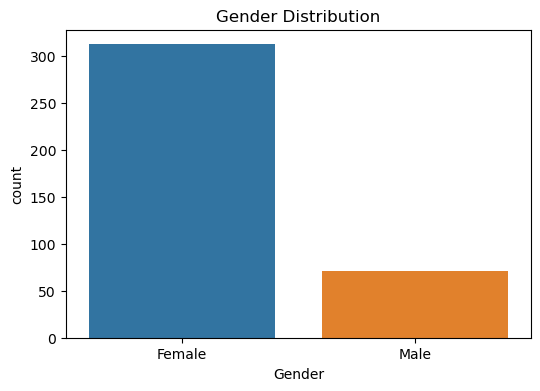

In [17]:
# What is the age and gender distribution of the patients

# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_thyroid['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.show()

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df_thyroid)
plt.title('Gender Distribution')
plt.show()

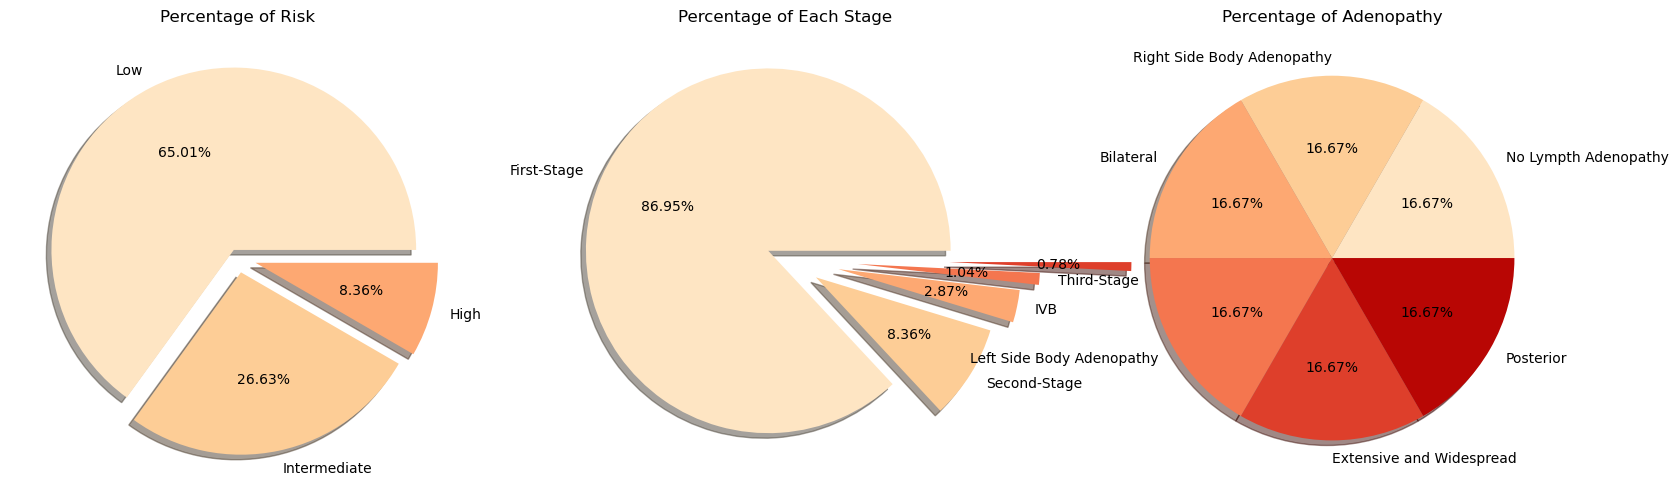

In [18]:
sns.set_palette("OrRd")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Pie chart for 'Risk'
risky = df_thyroid['Risk'].value_counts()
risky.plot(kind='pie', autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=risky.index, shadow=True, ax=axes[0])
axes[0].set_title('Percentage of Risk')
axes[0].set_ylabel('')

# Pie chart for 'Stage'
Stage_of_Cancer = df_thyroid['Stage'].value_counts()
Stage_of_Cancer.plot(kind='pie', autopct='%0.2f%%', labels=Stage_of_Cancer.index, explode=[0.1, 0.2, 0.3, 0.4, 0.9], shadow=True, ax=axes[1])
axes[1].set_title('Percentage of Each Stage')
axes[1].set_ylabel('')

# Pie chart for 'Adenopathy'
aden = df_thyroid['Adenopathy'].value_counts()
aden.value_counts().plot(kind='pie', autopct='%0.2f%%', labels=aden.index, shadow=True, ax=axes[2])
axes[2].set_title('Percentage of Adenopathy')
axes[2].set_ylabel('')


plt.show()

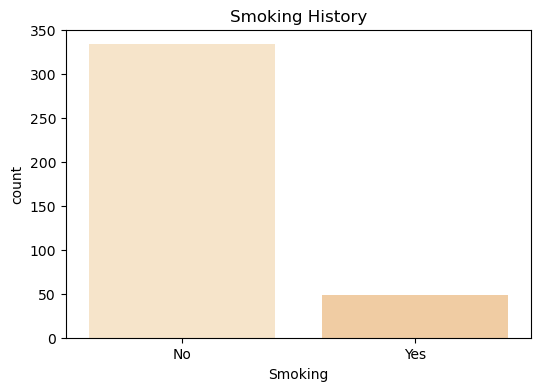

In [19]:
# Smoking and Radiation history
plt.figure(figsize=(6, 4))
sns.countplot(x='Smoking', data=df_thyroid)
plt.title('Smoking History')
plt.show()

In [20]:
#show the count of patient with radiotherapy history with thyriod cancer recurence
Recurred_by_radio = df_thyroid.groupby(['Radiotherapy_History','Recurred'])['Recurred'].count()
Recurred_by_radio

Radiotherapy_History  Recurred
No                    No          274
                      Yes         102
Yes                   No            1
                      Yes           6
Name: Recurred, dtype: int64

#### -From the result above. it can be clearly seen that 6 out of 7 patients that has ungone radiotherapy experience recurrence

#### - It is less than half of those that haven't done radiotherapy experience recurrence of the disease

In [21]:
def Age_group(x):
    if x <=20: 
        return 'Teenager'
    elif x >20 and x <= 30:
        return 'Adult'
    elif x > 30 and x<=50:
        return 'Young'
    elif x > 50 and x >=65:
        return 'old'
    else:
        return 'Aged'

In [22]:
Age_group(34)

'Young'

In [23]:
#using lambda function to apply the above created age_class function to the dataframe
df_thyroid["Age_group"] = df_thyroid["Age"].apply(lambda x: Age_group(x))

In [24]:
df_thyroid.groupby(['Age_group','Risk'])['Risk'].count()

Age_group  Risk        
Adult      High              1
           Intermediate     18
           Low              77
Aged       High              7
           Intermediate     24
           Low              37
Teenager   High              1
           Intermediate      6
           Low               6
Young      High             10
           Intermediate     45
           Low             117
old        High             13
           Intermediate      9
           Low              12
Name: Risk, dtype: int64

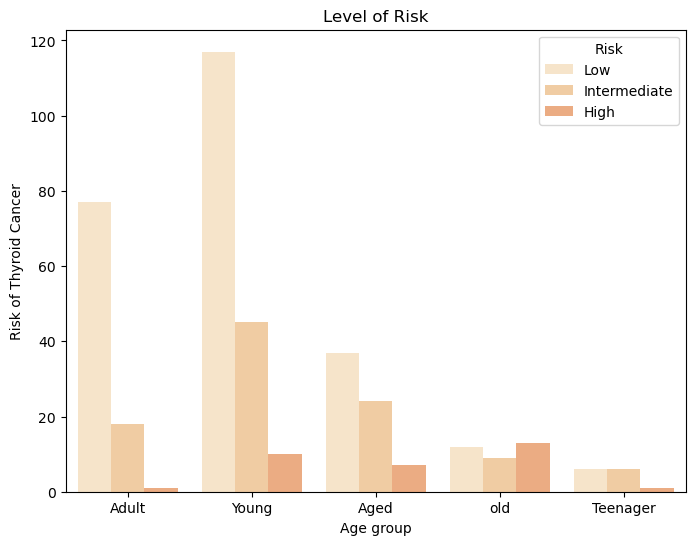

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot( x='Age_group',hue = 'Risk', data= df_thyroid)
plt.title('Level of Risk')
plt.xlabel('Age group')
plt.ylabel('Risk of Thyroid Cancer')
plt.legend(title='Risk')
plt.show()

In [26]:
def map_risk_to_percentage(risk):
    if risk == 'Low':
        return 1
    elif risk == 'Intermediate':
        return 2
    else:
        return 3

# Apply the function to create the new column
df_thyroid['Risk Rate (Out of 3)'] = df_thyroid['Risk'].apply(map_risk_to_percentage)

In [27]:
#Let's dee the count of age in different thyroid cancer stages
pd.set_option('display.max_columns', None)
pivot_table = pd.pivot_table(df_thyroid, values= 'Risk Rate (Out of 3)', index='Stage', columns='Age', fill_value=None).round()
pivot_table

Age,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,75,76,78,79,80,81,82
Stage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
First-Stage,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IVB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,3.0,3.0,3.0,3.0,NaN,3.0,NaN,NaN,3.0,NaN
Second-Stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,1.0,2.0
Third-Stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


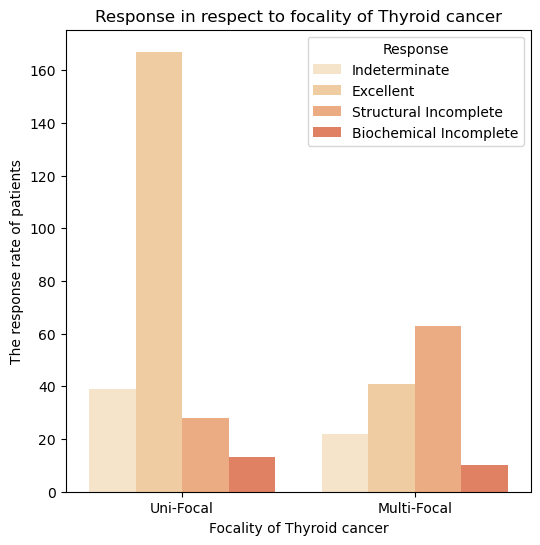

In [28]:
#let's explore the Response analysis.
# Let's see our the focality of nthe thyroid cancer affect tyhe response of patients
# Focality vs Response
plt.figure(figsize=(6, 6))
sns.countplot(x='Focality', hue='Response', data= df_thyroid)
plt.title('Response in respect to focality of Thyroid cancer')
plt.xlabel('Focality of Thyroid cancer')
plt.ylabel('The response rate of patients')
plt.show()

#### It can be clearly seen that the response of patient that are unifocal are mostly excellent while that of the multifocal are pretty bad (structural incomplete)

In [29]:
df_thyroid.groupby(['Radiotherapy_History','Recurred'])['Recurred'].count()

Radiotherapy_History  Recurred
No                    No          274
                      Yes         102
Yes                   No            1
                      Yes           6
Name: Recurred, dtype: int64

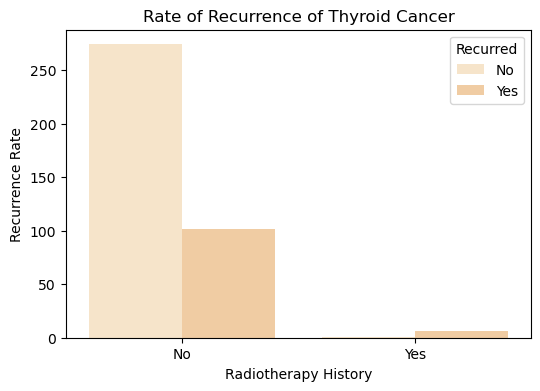

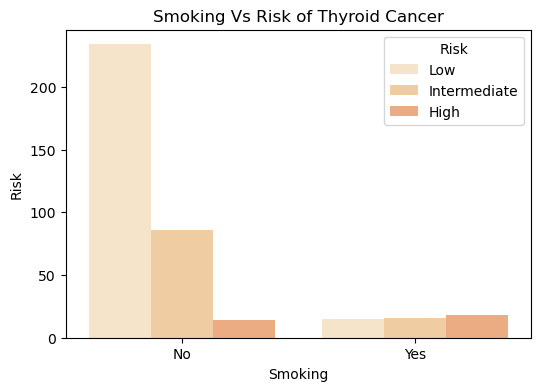

In [30]:
# Focality vs Response
plt.figure(figsize=(6, 4))
sns.countplot(x=('Radiotherapy_History'), hue='Recurred', data= df_thyroid)
plt.title('Rate of Recurrence of Thyroid Cancer')
plt.xlabel('Radiotherapy History')
plt.ylabel('Recurrence Rate')
plt.show()

#Smoking VS Response

plt.figure(figsize=(6, 4))
sns.countplot(x=('Smoking'), hue='Risk', data= df_thyroid)
plt.title('Smoking Vs Risk of Thyroid Cancer')
plt.xlabel('Smoking')
plt.ylabel('Risk')
plt.show()

In [31]:
#We can also confirm it using groupby
df_thyroid.groupby(['Smoking', 'Risk'])['Risk'].count()

Smoking  Risk        
No       High             14
         Intermediate     86
         Low             234
Yes      High             18
         Intermediate     16
         Low              15
Name: Risk, dtype: int64

#### Smoking can have an adverse effect on Thyroid Cancer as 18 out of possible 49 patients that smoke are in the high risk stage

# General Insight from the Analysis 

#### 1. Most of the patients with thyroid cancer are female
##### 2. The larger number of people with this disease are from 25 to 45
##### 3. There is high tendency of thyroid cancer reocurence from patients with radiotherapy history
##### 4. Patients that are above 50 andthode  with multifocal thyroid cancer are of high risk
##### 5. Smoking has adverse effect on the risk of this disease

### Thank you!!!